In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
import researchpy as rp

### Importing clean dataset for analysis

In [4]:
heart_database = pd.read_csv("Resources/heart_database_clean.csv")

In [5]:
heart_database.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0


In [6]:
# # #Replacing data categories/values

# heart_database['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Smoking'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Stroke'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)
# heart_database['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Asthma'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)
# heart_database['Sex'].replace({'Male':0,'Female':1}, inplace=True)
# heart_database['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)
# heart_database['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)
# heart_database['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

In [7]:
heart_database.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0


# Statistical Analysis

 ###  Chi-quare analysis: Is there a difference in distribution of heart disease by gender?¶

In [8]:
# Is there an association between gender & heart disease?
### Null hypothesis: Groups means are equal (no variation in means of groups)
### H0: μ1=μ2=…=μp
### Alternative hypothesis: At least, one group mean is different from other groups
### H1: All μ are not equal

# create contingency table
data_crosstab = pd.crosstab(heart_database['HeartDisease'],
                            heart_database['Sex'],
                           margins=True, margins_name="Total")

#significance level
alpha = 0.05

In [9]:
data_crosstab

Sex,0,1,Total
HeartDisease,,,
0,134135,154516,288651
1,15733,10868,26601
Total,149868,165384,315252


<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

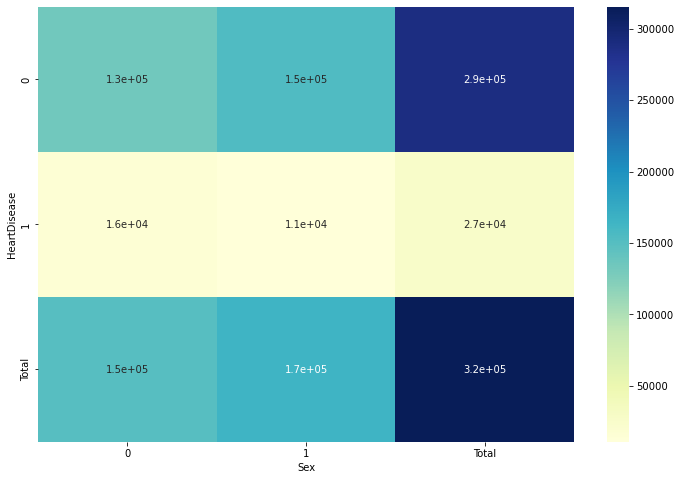

In [10]:
# Contigency tables heat map

plt.figure(figsize=(12,8)) 
sns.heatmap(data_crosstab, annot=True, cmap="YlGnBu")

In [11]:
# Calcualtion of Chisquare
chi_square = 0
rows = heart_database['HeartDisease'].unique()
columns = heart_database['Sex'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [12]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1568.9438582220878  and p value is: 0.0
Null Hypothesis is rejected.


In [13]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1568.9438582220878  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


### Chi-quare analysis: Is there a difference in distribution of heart disease by age category?

In [14]:
# Is there an association between age & heart disease?
### Null hypothesis: Groups means are equal (no variation in means of groups)
### H0: μ1=μ2=…=μp
### Alternative hypothesis: At least, one group mean is different from other groups
### H1: All μ are not equal

# create contingency table
data_crosstab = pd.crosstab(heart_database['AgeCategory'],
                            heart_database['HeartDisease'],
                           margins=True, margins_name="Total")

#significance level
alpha = 0.05

In [15]:
data_crosstab

HeartDisease,0,1,Total
AgeCategory,,,
0,20674,124,20798
1,16658,129,16787
2,18365,219,18584
3,20048,286,20334
4,20298,470,20768
5,20814,714,21528
6,23713,1329,25042
7,27195,2137,29332
8,29961,3225,33186


<AxesSubplot:xlabel='HeartDisease', ylabel='AgeCategory'>

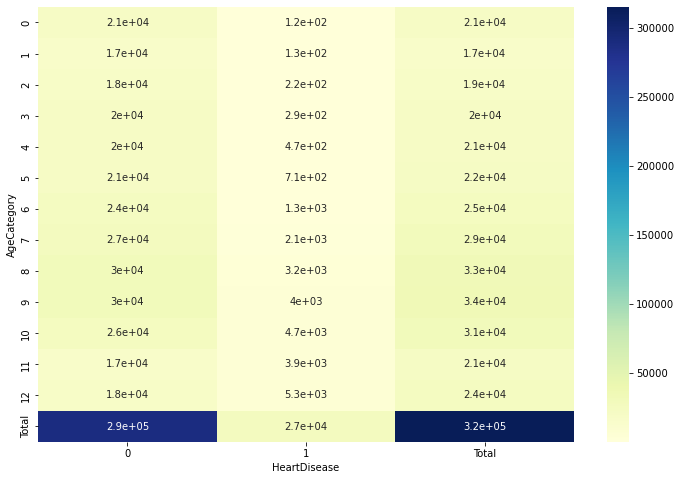

In [16]:
# Contigency tables heat map

plt.figure(figsize=(12,8)) 
sns.heatmap(data_crosstab, annot=True, cmap="YlGnBu")

In [17]:
# Calcualtion of Chisquare
chi_square = 0
rows = heart_database['AgeCategory'].unique()
columns = heart_database['HeartDisease'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [18]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 19046.393510518872  and p value is: 0.0
Null Hypothesis is rejected.


In [19]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 19046.393510518872  and critical value is: 21.02606981748307
Null Hypothesis is rejected.


### Multivariate Logisitc Regression: Are BMI, smoking, alcohol drinking, and prior stroke associated to heart disease?